In [38]:
import tensorflow as tf
from tensorflow.keras import layers,activations,losses,models,backend
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

print(tf.__version__)

2.3.0


In [84]:
data = pd.DataFrame()
data = pd.read_csv("https://raw.githubusercontent.com/vikram0230/Cancer-Prediction/master/data.csv")

In [86]:
data.dropna(axis=1, inplace=True)

In [87]:
data.drop(labels='id',axis=1,inplace=True)

In [88]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
values = data.drop(labels='diagnosis',axis=1)
targets = data.diagnosis

In [8]:
x_train,x_test,y_train,y_test = train_test_split(values,targets,test_size=0.2)

In [9]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_encoded_train = encoder.fit_transform(y_train)
y_encoded_test = encoder.fit_transform(y_test)

In [10]:
x_train.shape[1]

30

In [20]:
def create_model(layers,activation):
  model = models.Sequential()
  for i,nodes in enumerate(layers):
    print(nodes)
    if i==0:
      pass
      model.add(Dense(nodes, input_shape=[x_train.shape[1]], activation=activation))
    else:
      model.add(Dense(nodes, activation=activation))

  model.add(Dense(1))
  model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model)

In [60]:
layers = [[20],[64],[64,32],[64,64],[64,32,32],[64,64,32]]
activations = ['relu', 'sigmoid']
param_grid = dict(layers=layers,activation=activations,epochs=[30], batch_size=[50,20,100])

grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [61]:
grid.fit(x_train,y_train)

Streaming output truncated to the last 5000 lines.
Epoch 18/30
8/8 [==============================] - 0s 2ms/step - loss: 6.1446 - accuracy: 0.6016
Epoch 19/30
8/8 [==============================] - 0s 2ms/step - loss: 6.1446 - accuracy: 0.6016
Epoch 20/30
8/8 [==============================] - 0s 4ms/step - loss: 6.1446 - accuracy: 0.6016
Epoch 21/30
8/8 [==============================] - 0s 2ms/step - loss: 6.1446 - accuracy: 0.6016
Epoch 22/30
8/8 [==============================] - 0s 2ms/step - loss: 6.1446 - accuracy: 0.6016
Epoch 23/30
8/8 [==============================] - 0s 2ms/step - loss: 6.1446 - accuracy: 0.6016
Epoch 24/30
8/8 [==============================] - 0s 2ms/step - loss: 6.1446 - accuracy: 0.6016
Epoch 25/30
8/8 [==============================] - 0s 2ms/step - loss: 6.1446 - accuracy: 0.6016
Epoch 26/30
8/8 [==============================] - 0s 2ms/step - loss: 6.1446 - accuracy: 0.6016
Epoch 27/30
8/8 [==============================] - 0s 2ms/step - loss: 6.144

RuntimeError: ignored

In [62]:
grid.best_params_

{'activation': 'sigmoid',
 'batch_size': 50,
 'epochs': 30,
 'layers': [64, 64, 32]}

In [68]:
backend.clear_session()
class_model = models.Sequential([
  Dense(64, input_shape=[x_train.shape[1]], activation = 'sigmoid'),
  Dense(64, activation='sigmoid'),
  Dense(32, activation='sigmoid'),
  Dense(1)
])
class_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 8,257
Trainable params: 8,257
Non-trainable params: 0
_________________________________________________________________


In [69]:
class_model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [70]:
history = class_model.fit(x_train,y_encoded_train, epochs=50, validation_data=(x_test,y_encoded_test), batch_size=50)

Epoch 1/50
10/10 [==============================] - 0s 18ms/step - loss: 0.7676 - accuracy: 0.4835 - val_loss: 0.6326 - val_accuracy: 0.6754
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6590 - accuracy: 0.6154 - val_loss: 0.6026 - val_accuracy: 0.6754
Epoch 3/50
10/10 [==============================] - 0s 3ms/step - loss: 0.6290 - accuracy: 0.7692 - val_loss: 0.5857 - val_accuracy: 0.6842
Epoch 4/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5933 - accuracy: 0.6176 - val_loss: 0.5274 - val_accuracy: 0.6754
Epoch 5/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5631 - accuracy: 0.7165 - val_loss: 0.5133 - val_accuracy: 0.8684
Epoch 6/50
10/10 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.6659 - val_loss: 0.4541 - val_accuracy: 0.6754
Epoch 7/50
10/10 [==============================] - 0s 3ms/step - loss: 0.4825 - accuracy: 0.7516 - val_loss: 0.4402 - val_accuracy: 0.9123
Epoch 8/50
10/10 [=

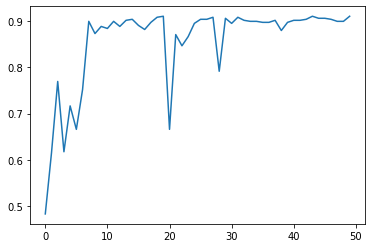

In [71]:
plt.plot(history.history['accuracy'])

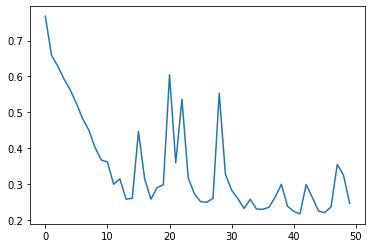

In [72]:
plt.plot(history.history['loss'])

In [73]:
class_model.evaluate(x_test,y_encoded_test, batch_size=50)

3/3 [==============================] - 0s 2ms/step - loss: 0.1967 - accuracy: 0.9123


[0.19666500389575958, 0.9122806787490845]